## Data Augmentation using Keras

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np

2023-11-13 21:20:09.402732: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-13 21:20:09.441260: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-13 21:20:09.441311: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-13 21:20:09.441351: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-13 21:20:09.449129: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-13 21:20:09.449394: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
%pwd

'/home/utpal108/dev/Python/PW_Skills_Projects/data-augmentation-fundamentals/notebooks'

In [3]:
os.chdir('../')

In [4]:
%pwd

'/home/utpal108/dev/Python/PW_Skills_Projects/data-augmentation-fundamentals'

In [5]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [6]:
# Instance of ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range = 45, # Random rotation between 0 and 45
    width_shift_range = 0.2, # Shift in x direction
    height_shift_range = 0.2, # Shift in y direction
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [7]:
# Load single image
img_path = os.path.join('dataset','image','cat.jpeg')
img = load_img(img_path)

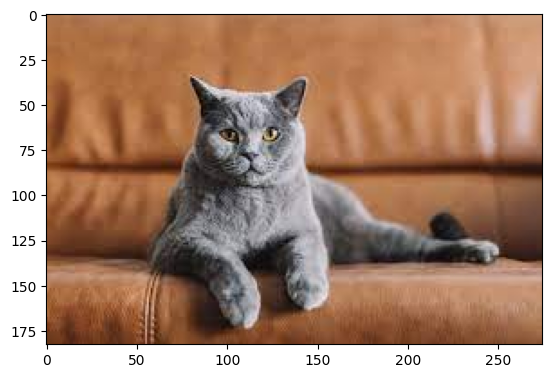

In [8]:
# Display image
plt.imshow(img)
plt.show()

In [9]:
x = img_to_array(img)
x.shape

(183, 275, 3)

In [10]:
# Add Number of Images Parameter, here it is 1 for single image

x = x.reshape((1,) + x.shape) 
x.shape

(1, 183, 275, 3)

In [11]:
# Perform data augmentation sing class single image
i = 0
for batch in datagen.flow(x, batch_size=20, save_to_dir='dataset/augmentated', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 10:
        break

In [12]:
# For multiple images of a class
img_dataset = []

img_dir = os.path.join('dataset', 'images', 'cat')
images = os.listdir(img_dir)

for single_img in images:
    img_path = os.path.join(img_dir, single_img)
    img = load_img(img_path, target_size=(255,255))
    img_array = img_to_array(img)
    img_dataset.append(img_array)

In [13]:
y = np.array(img_dataset)
y.shape

(4, 255, 255, 3)

In [14]:
# Data Augmentation for single class, multiple images
i=0
for batch in datagen.flow(y, batch_size=16, save_to_dir='dataset/single_augmentated/', save_prefix='cat', save_format='png'):
    i += 1
    if i >20:
        break

In [15]:
# For multiple class images
i=0
for batch in datagen.flow_from_directory(directory='dataset/images/', batch_size=16, target_size=(256,256), color_mode='rgb', save_to_dir='dataset/multi_augmentated', save_prefix='aug', save_format='png'):
    i += 1
    if i > 31:
        break

Found 7 images belonging to 2 classes.
